# CSE 163 Final Project — Exploratory Data Analysis (EDA)

This notebook contains the exploratory data analysis (EDA) for our CSE 163 final project on social media addiction and student outcomes.  
We load and clean the dataset, examine missing values, and explore patterns in social media addiction across countries and its relationships with mental health, sleep duration, and relationship conflicts.

All analysis in this notebook is used to inform our later machine learning models.

In [196]:
import pandas as pd
df = pd.read_csv("Students Social Media Addiction.csv")

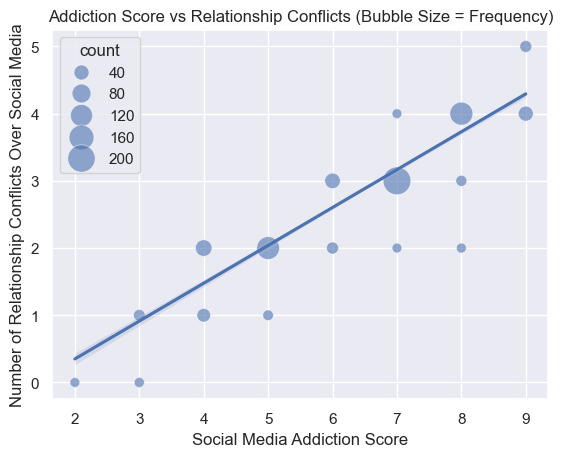

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set_theme(style="darkgrid")

# Keep only needed columns
cols = ["Addicted_Score", "Conflicts_Over_Social_Media"]
df_clean = df[cols].dropna()

# Count duplicate (x, y) pairs
df_counts = (
    df_clean
    .groupby(["Addicted_Score", "Conflicts_Over_Social_Media"])
    .size()
    .reset_index(name="count")
)

# plt.figure(figsize=(8, 6))

# Bubble scatter (size = frequency)
sns.scatterplot(
    data=df_counts,
    x="Addicted_Score",
    y="Conflicts_Over_Social_Media",
    size="count",
    sizes=(50, 400),
    alpha=0.6,  # Bubble color
)

# Regression line using original (non-aggregated) data
sns.regplot(
    data=df_clean,
    x="Addicted_Score",
    y="Conflicts_Over_Social_Media",
    scatter=False
)

plt.xlabel("Social Media Addiction Score")
plt.ylabel("Number of Relationship Conflicts Over Social Media")
plt.title("Addiction Score vs Relationship Conflicts (Bubble Size = Frequency)")
plt.show()


## RQ3 EDA: Mental Health, Sleep Duration, and Social Media Addiction

To explore whether mental health and sleep duration are associated with students’ levels of social media addiction, we visualize all three variables in a single figure. The x-axis represents `Mental_Health_Score`, the y-axis represents `Sleep_Hours_Per_Night`, and color intensity represents `Addicted_Score`. This color-mapped scatter plot allows us to observe how addiction levels vary across different combinations of mental health and sleep duration.


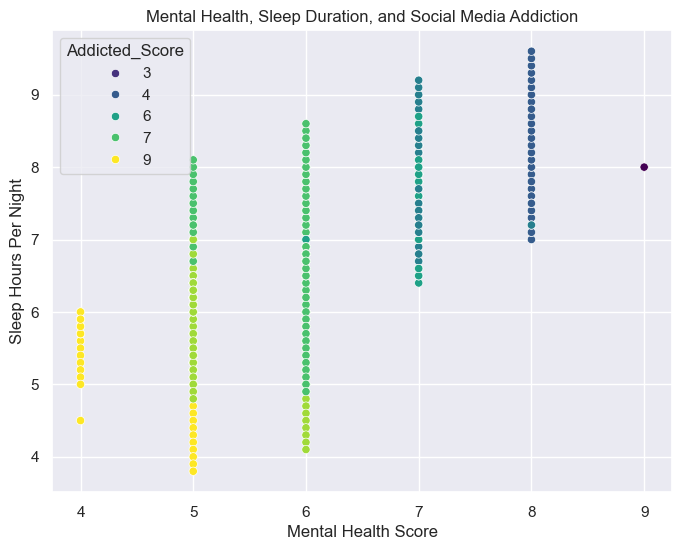

In [198]:
# Select relevant columns and drop missing values
cols = ["Mental_Health_Score", "Sleep_Hours_Per_Night", "Addicted_Score"]
df_clean = df[cols].dropna()

plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df_clean,
    x="Mental_Health_Score",
    y="Sleep_Hours_Per_Night",
    hue="Addicted_Score",
    palette="viridis",   # color for visualization
)

plt.title("Mental Health, Sleep Duration, and Social Media Addiction")
plt.xlabel("Mental Health Score")
plt.ylabel("Sleep Hours Per Night")
plt.show()
